# 6.4 Supervised Machine Learning: Regression

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
#Importing dataframes
df = pd.read_csv(r'/Users/tiffanib./Desktop/Career Foundry Data Analytics/Achievement 6/2025-11-15 Gun Violence Analysis/02 Data/Original Data/gun-violence-data_01-2013_03-2018.csv',index_col = False)

In [4]:
path = '/Users/tiffanib./Desktop/Career Foundry Data Analytics/Achievement 6/2025-11-15 Gun Violence Analysis'

In [5]:
#checking path
path

'/Users/tiffanib./Desktop/Career Foundry Data Analytics/Achievement 6/2025-11-15 Gun Violence Analysis'

In [6]:
#importing gun violence data
datacleaned = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','Data_cleanedgv.csv'), index_col = False)

In [7]:
#checking the shape of the imported data
datacleaned.shape

(239677, 26)

In [8]:
datacleaned.head()

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,longitude,n_guns_involved,notes,participant_age_group,participant_gender,participant_status,participant_type,sources,state_house_district,state_senate_district
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,...,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,Unknown,Unknown
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,...,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,...,-82.1377,2.0,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,...,-104.8020,NaN,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,...,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [10]:
#creating variables to assist with analysis
#Create total casualties as sum of killed and injured
datacleaned['total_casualties'] = datacleaned['n_killed'] + datacleaned['n_injured']

In [11]:
#checking the dataframe to see the columns
print(datacleaned[['n_killed', 'n_injured', 'total_casualties']].head())

   n_killed  n_injured  total_casualties
0         0          4                 4
1         1          3                 4
2         1          3                 4
3         4          0                 4
4         2          2                 4


In [12]:
#creating variable if any person was killed in the incident
datacleaned['is_fatal'] = (datacleaned['n_killed'] > 0).astype(int)

#creating variable if any person was injured
datacleaned['has_injuries'] = (datacleaned['n_injured'] > 0).astype(int)

# creating variable if total casualties are 4 or more (This can be used as a high severity flag)
datacleaned['high_casualty'] = (datacleaned['total_casualties'] >= 4).astype(int)

# creating a variable if more than one victim (killed or injured)
datacleaned['multi_victim'] = (datacleaned['total_casualties'] > 1).astype(int)


In [13]:
# Check a sample of the new flag columns
print(datacleaned[['n_killed', 'n_injured', 'total_casualties',
                      'is_fatal', 'has_injuries', 'high_casualty', 'multi_victim']].head(20))

    n_killed  n_injured  total_casualties  is_fatal  has_injuries  \
0          0          4                 4         0             1   
1          1          3                 4         1             1   
2          1          3                 4         1             1   
3          4          0                 4         1             0   
4          2          2                 4         1             1   
5          4          0                 4         1             0   
6          5          0                 5         1             0   
7          0          5                 5         0             1   
8          0          4                 4         0             1   
9          1          6                 7         1             1   
10         1          3                 4         1             1   
11         1          3                 4         1             1   
12         2          3                 5         1             1   
13         0          5           

In [18]:
#dropping these columns as they are not useful
columns_to_remove = ['incident_url','source_url','notes',]
datacleaned = datacleaned.drop(columns=columns_to_remove)

In [19]:
#checking dataframe for removal
datacleaned

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url_fields_missing,congressional_district,...,participant_status,participant_type,sources,state_house_district,state_senate_district,total_casualties,is_fatal,has_injuries,high_casualty,multi_victim
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,False,14.0,...,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,Unknown,Unknown,4,0,1,1,1
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,False,43.0,...,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,4,1,1,1,1
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,False,9.0,...,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,4,1,1,1,1
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,False,6.0,...,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,4,1,0,1,1
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,False,6.0,...,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,4,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,False,Unknown,...,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,Unknown,Unknown,0,0,0,0,0
239673,239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,False,4.0,...,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0,1,1,0,0,0
239674,239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,False,2.0,...,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0,1,0,1,0,0
239675,239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,False,9.0,...,0::Killed,0::Victim,http://www.khou.com/article/news/hpd-investiga...,149.0,17.0,1,1,0,0,0


In [20]:
print(datacleaned.columns.tolist())


['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured', 'incident_url_fields_missing', 'congressional_district', 'gun_stolen', 'gun_type', 'incident_characteristics', 'latitude', 'longitude', 'n_guns_involved', 'participant_age_group', 'participant_gender', 'participant_status', 'participant_type', 'sources', 'state_house_district', 'state_senate_district', 'total_casualties', 'is_fatal', 'has_injuries', 'high_casualty', 'multi_victim']


In [21]:
#dropping these columns as they are not useful either
columns_to_remove = ['sources','state_senate_district', 'state_house_district']
datacleaned = datacleaned.drop(columns=columns_to_remove)

In [22]:
#checking the dataframes for removal
print(datacleaned.columns.tolist())

['Unnamed: 0', 'incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured', 'incident_url_fields_missing', 'congressional_district', 'gun_stolen', 'gun_type', 'incident_characteristics', 'latitude', 'longitude', 'n_guns_involved', 'participant_age_group', 'participant_gender', 'participant_status', 'participant_type', 'total_casualties', 'is_fatal', 'has_injuries', 'high_casualty', 'multi_victim']


In [24]:
#exporting clean dataframe for future use
datacleaned.to_csv(os.path.join(path,'02 Data','Prepared Data','Data_cleaned_updated.csv'))

In [25]:
#checking the shape
datacleaned.shape

(239677, 25)

In [26]:
datacleaned.head()

,Unnamed: 0,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url_fields_missing,congressional_district,...,n_guns_involved,participant_age_group,participant_gender,participant_status,participant_type,total_casualties,is_fatal,has_injuries,high_casualty,multi_victim
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,False,14.0,...,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,0,1,1,1
1,1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,False,43.0,...,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,4,1,1,1,1
2,2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,False,9.0,...,2.0,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,4,1,1,1,1
3,3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,False,6.0,...,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,4,1,0,1,1
4,4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,False,6.0,...,2.0,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,4,1,1,1,1


# 03 Visualizing variables for potential analysis

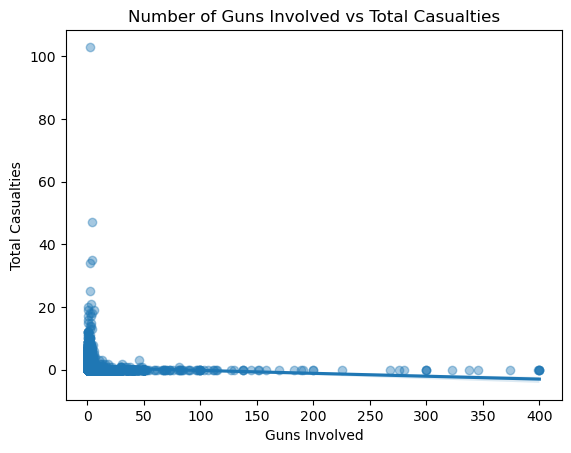

In [30]:
#scatterplot of variables for guns involved vs total casualities

sns.regplot(
    x=datacleaned['n_guns_involved'],
    y=datacleaned['total_casualties'],
    scatter_kws={'alpha':0.4}
)

plt.title('Number of Guns Involved vs Total Casualties')
plt.xlabel('Guns Involved')
plt.ylabel('Total Casualties')
plt.show()


Hypothesis: Incidents with more guns involved results in fewer total casualties.

# 04 Regression Analysis

In [36]:
#Splitting the data into subsets
X = datacleaned['n_guns_involved'].values.reshape(-1,1)
y = datacleaned['total_casualties'].values.reshape(-1,1)


In [37]:
X

array([[nan],
       [nan],
       [ 2.],
       ...,
       [ 1.],
       [ 1.],
       [ 2.]])

In [38]:
y

array([[4],
       [4],
       [4],
       ...,
       [1],
       [1],
       [2]])

In [39]:
#splitting the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
#creating a regression object
#this will fit into the training set
regression = LinearRegression()

In [43]:
datacleaned['n_guns_involved'] = datacleaned['n_guns_involved'].fillna(0)
datacleaned['total_casualties'] = datacleaned['total_casualties'].fillna(0)

In [44]:
#fit the regression object onto the training set
regression.fit(X_train,y_train)

LinearRegression()

In [45]:
#predict the values of y using X
y_predicted = regression.predict(X_test)

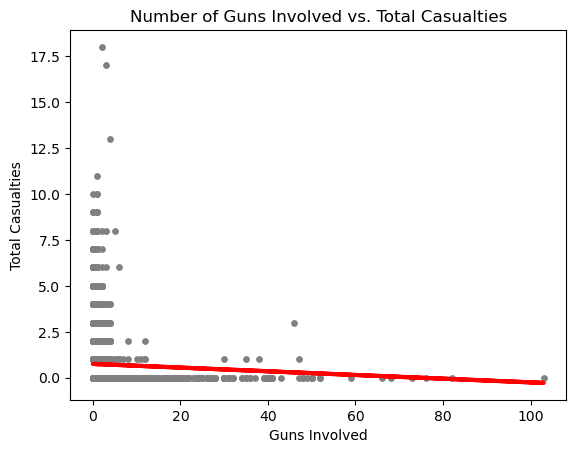

In [47]:
#creating a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Guns Involved vs. Total Casualties')
plot_test.xlabel('Guns Involved')
plot_test.ylabel('Total Casualties')
plot_test.show()

The regression line shows a very weak fit to the data. Most of the points are tightly clustered near zero casualties, with a few scattered higher up. Because the majority of incidents involve only one or two guns and very low casualty counts, the line stays almost flat. This indicates that the number of guns involved does not strongly predict total casualties in this dataset. The large spread of points above the line and the number of outliers also suggest that other factors are driving casualty levels, not just how many guns were involved.

In [48]:
# create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [49]:
#printing the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [-0.01004701]
Mean squared error:  0.6374337408199119
R2 score:  0.003387223351752011


In [50]:
y_predicted

array([0.74435766, 0.74435766, 0.74435766, ..., 0.74435766, 0.75440467,
       0.74435766])

In [52]:
#creating a datframe comparing the actual and the predicted

data = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
data.head(30)

,Actual,Predicted
194815,1,0.744358
154177,1,0.744358
168408,1,0.744358
31176,0,0.754405
91346,1,0.754405
94189,0,0.754405
226216,1,0.744358
220360,0,0.744358
53720,2,0.754405
1416,2,0.754405


The model shows very weak predictive performance on the test set. The predicted values stay between 0.62 and 0.75 for all cases, while the actual casualty values range from 0 to 2. This indicates that the number of guns involved does not meaningfully explain variation in total casualties. The model is unable to differentiate between low, medium, and higher-casualty incidents, suggesting a poor fit and low predictive power.